In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from workalendar.europe import Belgium
import matplotlib
import sys
from matplotlib import pyplot
np.set_printoptions(threshold=sys.maxsize)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'g'

In [2]:
 def preprocess(dataframe):
        dataframe.index = pd.to_datetime(dataframe.index)
        cal = Belgium()
        years = list(range(2014, 2025))
        holidays = []
        for year in years:
            holidays.extend(cal.holidays(year))
        dataframe = dataframe.sort_index()
        dataframe['Valeur'] = dataframe.iloc[:,0]
        dataframe['working day'] = dataframe.index.map(cal.is_working_day)
        dataframe['hour of day'] = dataframe.index.hour
        dataframe['day of week'] = dataframe.index.dayofweek
        dataframe['month'] = dataframe.index.month
        dataframe['minutes'] = dataframe.index.minute
        # we encode cynical data into two dimensions using a sine and cosine transformations
        def encode(data, col, max_val):
            data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
            data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
            return data
        dataframe = encode(dataframe, 'hour of day', 23)
        dataframe = encode(dataframe, 'day of week', 6)
        dataframe = encode(dataframe, 'month', 12)
        dataframe = encode(dataframe, 'minutes', 60)
        dataframe = dataframe.drop(['hour of day', 'day of week', 'month', 'minutes'], axis=1)
        dataframe = dataframe.fillna(method='ffill')
        dataframe['Valeur'] = dataframe['Valeur'].replace(to_replace=0, method='ffill').values
        return dataframe

In [3]:
n_test = 10 * 672
train = y.iloc[0:(len(model_data)-n_test)]
test = y.iloc[len(train):(len(model_data)-1)]

NameError: name 'y' is not defined

In [3]:
y = pd.read_csv('./Consumption_15min.csv', index_col=0)
y.head()

,Valeur
Datetime,
2014-12-06 00:00:00,7.14
2014-12-06 00:15:00,7.56
2014-12-06 00:30:00,6.72
2014-12-06 00:45:00,6.93
2014-12-06 01:00:00,7.14


In [4]:
y.index = pd.to_datetime(y.index)
y.sort_index(inplace=True)
#y.index = y.index.to_timestamp()
#y.index = y.index.to_freq('15T')
y.head()

,Valeur
Datetime,
2014-12-06 00:00:00,7.14
2014-12-06 00:15:00,7.56
2014-12-06 00:30:00,6.72
2014-12-06 00:45:00,6.93
2014-12-06 01:00:00,7.14


In [5]:
y = preprocess(y)
y.head()

,Valeur,working day,hour of day_sin,hour of day_cos,day of week_sin,day of week_cos,month_sin,month_cos,minutes_sin,minutes_cos
Datetime,,,,,,,,,,
2014-12-06 00:00:00,7.14,False,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00
2014-12-06 00:15:00,7.56,False,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,1.000000e+00,2.832769e-16
2014-12-06 00:30:00,6.72,False,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,5.665539e-16,-1.000000e+00
2014-12-06 00:45:00,6.93,False,0.000000,1.000000,-0.866025,0.5,-2.449294e-16,1.0,-1.000000e+00,-1.836970e-16
2014-12-06 01:00:00,7.14,False,0.269797,0.962917,-0.866025,0.5,-2.449294e-16,1.0,0.000000e+00,1.000000e+00


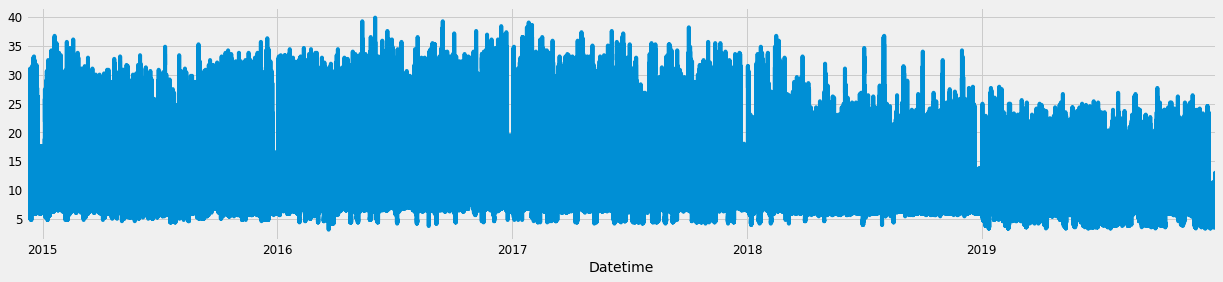

In [6]:
y.Valeur.plot(figsize =(19,4) )
plt.show()

In [7]:
t = sm.tsa.adfuller(y.Valeur, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                    -23.936548
p-value                             0.000000
#Lags Used                         78.000000
Number of Observations Used    177713.000000
dtype: float64

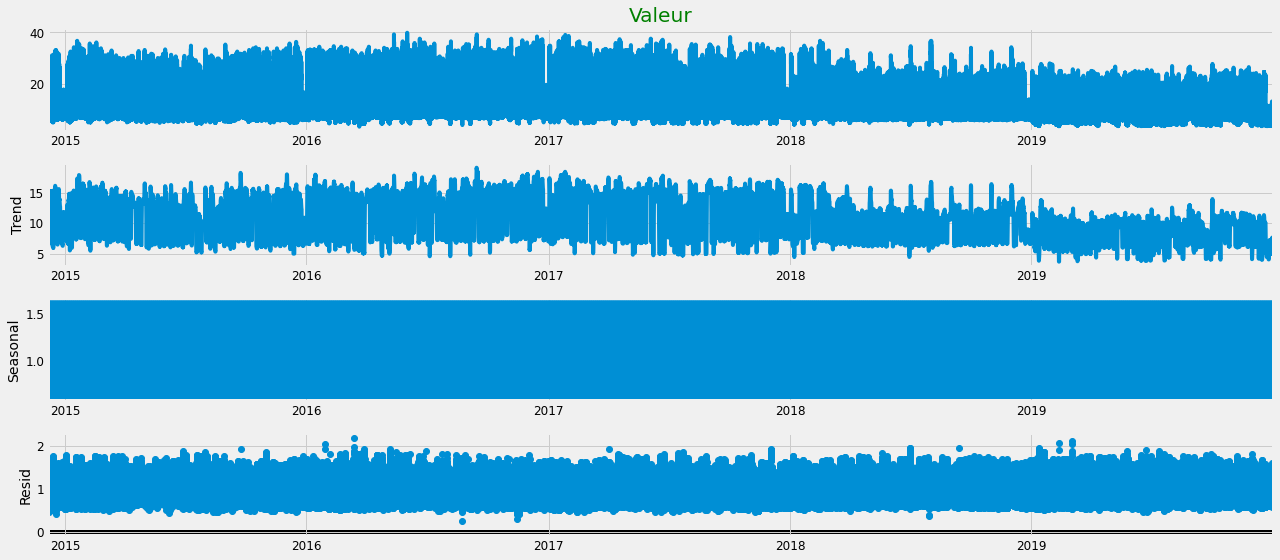

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y.Valeur, model='multiplicative', period=96)
fig = decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 96) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 96)
SARIMAX: (1, 1, 2) x (1, 1, 3, 96)
SARIMAX: (1, 1, 3) x (1, 2, 1, 96)
SARIMAX: (1, 1, 3) x (1, 2, 2, 96)


In [ ]:
warnings.filterwarnings("ignore")
aic_min = 100000000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y['Valeur'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))
            if result.aic < ain_min:
                aic_min = results.aic
                par_min = param
                pars_min = param_seasonal
        except: 
            continue
print('Minimum ARIMA{}x{}12 - AIC:{}'.format(par_min,pars_min,aic_min))


In [11]:
param = (0, 0, 0)
param_seasonal = (0, 1, 1, 96) 
mod = sm.tsa.statespace.SARIMAX(y.Valeur,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{} - AIC:{}'.format(param,param_seasonal,results.aic))

/home/ubuntu/anaconda3/envs/evgeny/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  warnings.warn('No frequency information was'
/home/ubuntu/anaconda3/envs/evgeny/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  warnings.warn('No frequency information was'


KeyboardInterrupt: 

In [13]:
endog = y['Valeur']
print(endog.head(5))
mod = sm.tsa.statespace.SARIMAX(endog,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 96),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

Datetime
2014-12-06 00:00:00    7.14
2014-12-06 00:15:00    7.56
2014-12-06 00:30:00    6.72
2014-12-06 00:45:00    6.93
2014-12-06 01:00:00    7.14
Name: Valeur, dtype: float64


/home/ubuntu/anaconda3/envs/evgeny/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  warnings.warn('No frequency information was'
/home/ubuntu/anaconda3/envs/evgeny/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  warnings.warn('No frequency information was'


KeyboardInterrupt: 

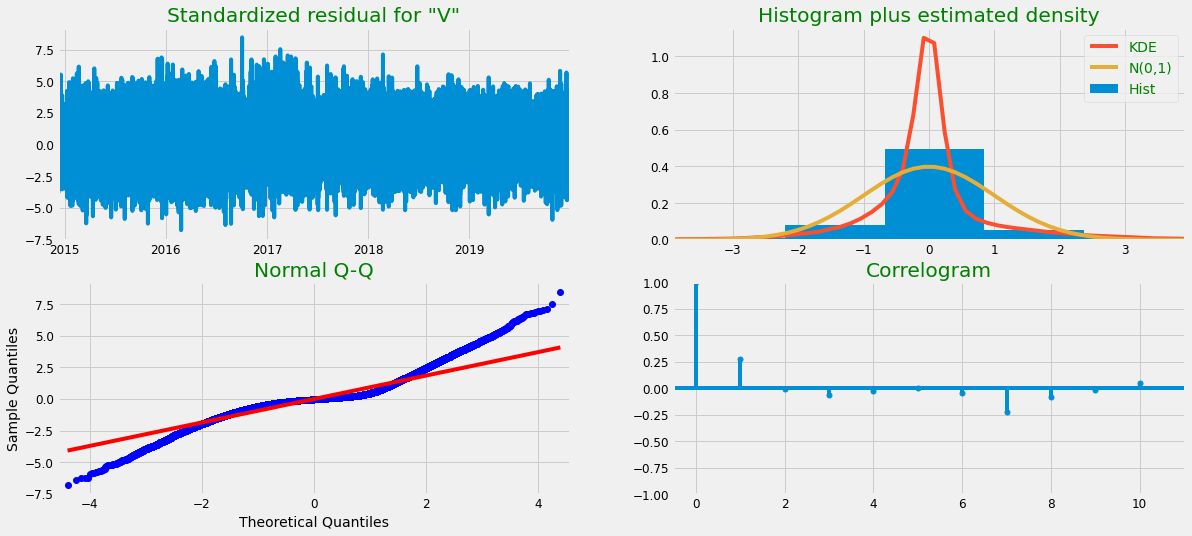

In [42]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [44]:
#Testing the stationarity of the datasets

from statsmodels.tsa.stattools import adfuller

result = adfuller(np.log(y),autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -25.282573
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [45]:
split = round(len(y) / 2)
X1, X2 = y[0:split], y[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=12.198384, mean2=10.182090
variance1=58.093488, variance2=37.991810


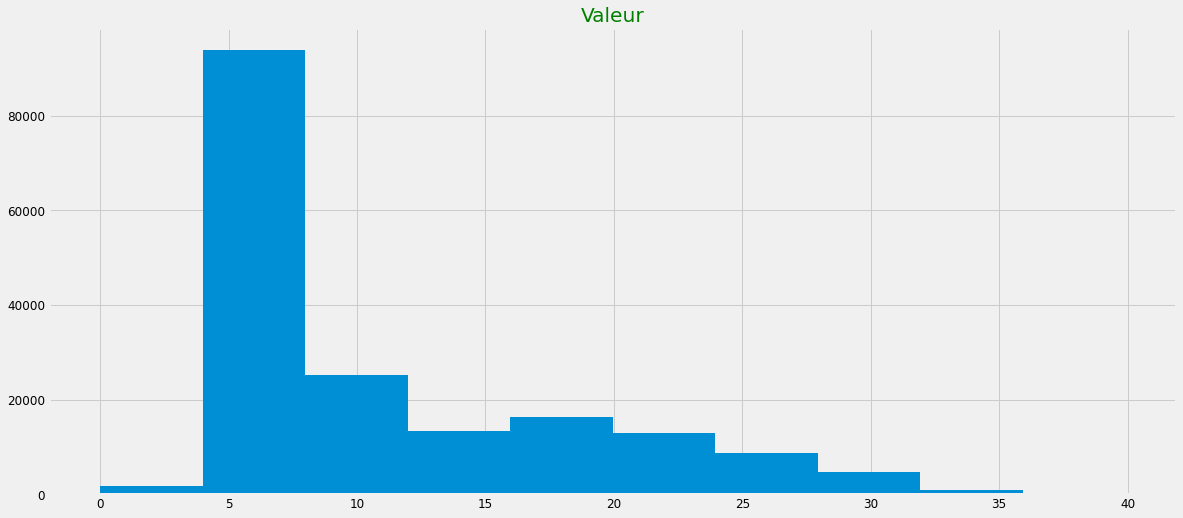

In [46]:
df.hist()
pyplot.show()

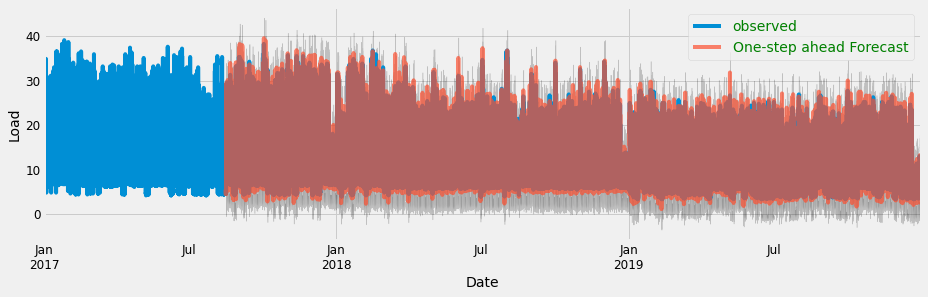

In [47]:
pred = results.get_prediction(start=pd.to_datetime('2017-08-16'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Load')
plt.legend()
plt.show()

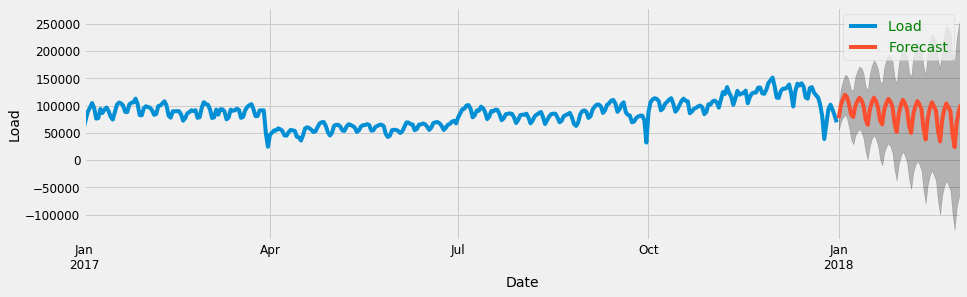

In [13]:

pred_uc = results.get_forecast(steps=60)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Load')
plt.legend()
plt.show()

In [16]:
forecast = pred_uc.predicted_mean
forecast.head(30)

2018-01-01     76958.075790
2018-01-02    100868.416020
2018-01-03    111590.112162
2018-01-04    119976.515055
2018-01-05    115724.411756
2018-01-06    101670.634212
2018-01-07     83172.470536
2018-01-08     79327.212950
2018-01-09     99277.673919
2018-01-10    108449.106938
2018-01-11    114367.571228
2018-01-12    110261.678964
2018-01-13     98828.775416
2018-01-14     74944.155997
2018-01-15     64590.172559
2018-01-16     92399.669811
2018-01-17    106448.773035
2018-01-18    114790.533699
2018-01-19    108233.173418
2018-01-20     96317.818703
2018-01-21     72663.567740
2018-01-22     65673.844285
2018-01-23     92545.706150
2018-01-24    104782.033706
2018-01-25    112557.994246
2018-01-26    107534.932374
2018-01-27     96864.711185
2018-01-28     66909.251147
2018-01-29     51672.234230
2018-01-30     84470.172570
Freq: D, dtype: float64

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-08-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2017-08-16 00:00:00   NaN
2017-08-17 00:00:00   NaN
2017-08-18 00:00:00   NaN
2017-08-19 00:00:00   NaN
2017-08-20 00:00:00   NaN
2017-08-21 00:00:00   NaN
2017-08-22 00:00:00   NaN
2017-08-23 00:00:00   NaN
2017-08-24 00:00:00   NaN
2017-08-25 00:00:00   NaN
2017-08-26 00:00:00   NaN
2017-08-27 00:00:00   NaN
2017-08-28 00:00:00   NaN
2017-08-29 00:00:00   NaN
2017-08-30 00:00:00   NaN
2017-08-31 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-09-02 00:00:00   NaN
2017-09-03 00:00:00   NaN
2017-09-04 00:00:00   NaN
2017-09-05 00:00:00   NaN
2017-09-06 00:00:00   NaN
2017-09-07 00:00:00   NaN
2017-09-08 00:00:00   NaN
2017-09-09 00:00:00   NaN
2017-09-10 00:00:00   NaN
2017-09-11 00:00:00   NaN
2017-09-12 00:00:00   NaN
2017-09-13 00:00:00   NaN
2017-09-14 00:00:00   NaN
                       ..
2017-12-03 00:00:00   NaN
2017-12-04 00:00:00   NaN
2017-12-05 00:00:00   NaN
2017-12-06 00:00:00   NaN
2017-12-07 00:00:00   NaN
2017-12-08 00:00:00   NaN
2017-12-09 0